## Ranking Data - Understanding the co-relation between keyword rankings with description or any other attribute.

# *Suggested Questions*:-

1. Is there any co-relation between short description, long description and ranking? Does the placement of keyword (for example    using a keyword in the first 10 words - have any co-relation with the ranking)?
2. Does APP ID (Also known as package name) play any role in ranking?
3. Any other pattern or good questions that you can think of and answer?


# *Libraries*

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# *Importing data*

In [3]:
rank=pd.read_csv("browser_rankings_data.csv")

In [4]:
rank.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description
0,1,browser,2.0,in,en,16-12-2020,net.fast.web.browser,18-12-2020,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows..."
1,2,browser,3.0,in,en,16-12-2020,com.android.chrome,18-12-2020,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu..."
2,3,browser,4.0,in,en,16-12-2020,com.opera.browser,27-02-2021,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest..."
3,3,browser,4.0,in,en,16-12-2020,com.opera.browser,18-12-2020,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And..."
4,4,browser,1.0,in,en,16-12-2020,com.cloudmosa.puffinTV,07-02-2021,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...


In [5]:
rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               3066 non-null   int64  
 1   Keyword                          3066 non-null   object 
 2   Rank                             3050 non-null   float64
 3   Country                          3066 non-null   object 
 4   Language                         3066 non-null   object 
 5   Date                             3066 non-null   object 
 6   App ID                           3066 non-null   object 
 7   Date of Last Description Change  3066 non-null   object 
 8   Short Description                3066 non-null   object 
 9   Long Description                 3066 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 239.7+ KB


In [6]:
rank.shape

(3066, 10)

In [7]:
# Checking unique values

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


@interact(feature=rank.columns.to_list())
def describe_features(feature):
    print ("Number of unique values in {} column are {} \n The unique values are {}".format(feature, len(rank[feature].unique()),rank[feature].unique()))

interactive(children=(Dropdown(description='feature', options=('ID', 'Keyword', 'Rank', 'Country', 'Language',…

# *Data Preparation*

In [8]:
#Checking Null values

rank.isnull().sum()

ID                                  0
Keyword                             0
Rank                               16
Country                             0
Language                            0
Date                                0
App ID                              0
Date of Last Description Change     0
Short Description                   0
Long Description                    0
dtype: int64

In [9]:
#Importing KNNImputer from SKlearn to impute missing values


from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3, weights='uniform', missing_values=np.nan)
rank['Rank'] = imputer.fit_transform(rank[['Rank']])

In [10]:
rank.isnull().sum()

ID                                 0
Keyword                            0
Rank                               0
Country                            0
Language                           0
Date                               0
App ID                             0
Date of Last Description Change    0
Short Description                  0
Long Description                   0
dtype: int64

In [11]:
#Changing dates from object to date time stamp

rank['Date'] = pd.to_datetime(rank['Date'])
rank['Date of Last Description Change'] = pd.to_datetime(rank['Date of Last Description Change'])

In [12]:
rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   ID                               3066 non-null   int64         
 1   Keyword                          3066 non-null   object        
 2   Rank                             3066 non-null   float64       
 3   Country                          3066 non-null   object        
 4   Language                         3066 non-null   object        
 5   Date                             3066 non-null   datetime64[ns]
 6   App ID                           3066 non-null   object        
 7   Date of Last Description Change  3066 non-null   datetime64[ns]
 8   Short Description                3066 non-null   object        
 9   Long Description                 3066 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(6)
memory

In [13]:
#Label Encoding to transfrom data for use



from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
list1=['Keyword','App ID','Short Description','Long Description']
for i in list1:
    rank[i]= label_encoder.fit_transform(rank[i])
    rank[i].unique()
rank['Country']=rank['Country'].replace('in',0)
rank['Language']=rank['Language'].replace('en',0)

In [14]:
rank.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description
0,1,3,2.0,0,0,2020-12-16,7,2020-12-18,8,2
1,2,3,3.0,0,0,2020-12-16,0,2020-12-18,3,1
2,3,3,4.0,0,0,2020-12-16,4,2021-02-27,2,0
3,3,3,4.0,0,0,2020-12-16,4,2020-12-18,2,3
4,4,3,1.0,0,0,2020-12-16,2,2021-07-02,6,9


In [15]:
#Dropping Country and Launguage columns because as there are not significant.

rank = rank.drop(columns=['Country', 'Language'], axis=1)
rank.head()

,ID,Keyword,Rank,Date,App ID,Date of Last Description Change,Short Description,Long Description
0,1,3,2.0,2020-12-16,7,2020-12-18,8,2
1,2,3,3.0,2020-12-16,0,2020-12-18,3,1
2,3,3,4.0,2020-12-16,4,2021-02-27,2,0
3,3,3,4.0,2020-12-16,4,2020-12-18,2,3
4,4,3,1.0,2020-12-16,2,2021-07-02,6,9


# Now data is prepared for further use

## *Corelation Heat Map*

1. Using Corelation heatmap We can know the corelation between the features.
2. If corelation is either +1 or -1 they have good corelation and if it's close to 0 they have no corelation.


## Checking Corelation

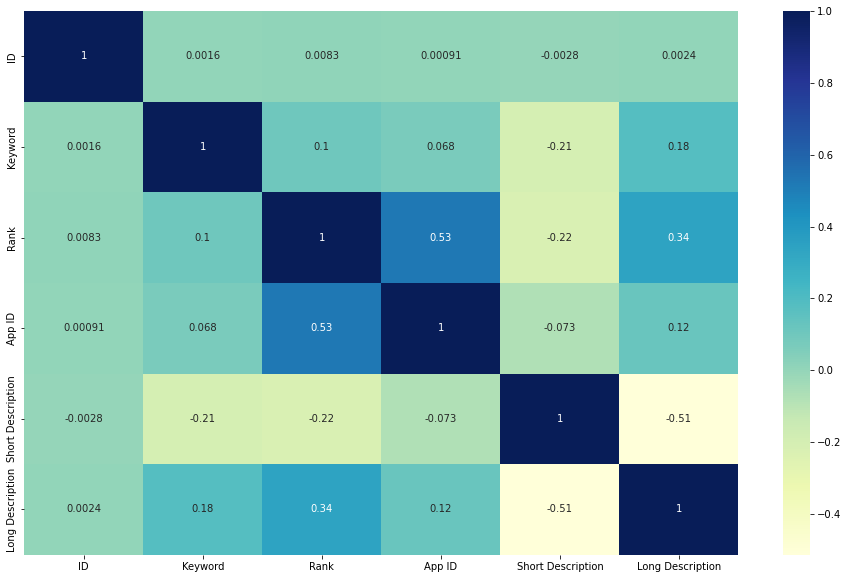

In [18]:
plt.figure(figsize = (16, 10))
sns.heatmap(rank.corr(), annot = True, cmap="YlGnBu")
plt.show()

## *Observations*

1. ID do not have a significant monotonically correlation with any of the feature.
2. Keyword is most negatively correlated with Short Description, with APP ID & Long Description somewhat positively correlated.
3. Rank is most positively correlated with App ID among all the features, somewhat positively correlated with Short Description & no significant monotonically correlated with any of the other feature.
4. Short Description & Long Descriptions are the most negatively correlated with each other & among all too, Also Short Description is somewhat negatively correlated with Keyword.
5. Long Description do not have a significant monotonically correlation with ID & somewhat positively correlated with Keyword, Rank, App ID as compared to ID.


## *Suggested Questions*:

### 1. Is there any co-relation between short description, long description and ranking? Does the placement of keyword (for example using a keyword in the first 10 words - have any co-relation with the ranking)?

1. Short Description and ranking are negatively corelated but not of much significance.
2. Similarly, Even long description is positively corelated with rank but not of much significannce
3. Even descriptions have no good corelation between keyword and also keyword, rank are also weakly corelated, So inclusion of keyword in description maynot have effect in ranking.


### 2. Does App ID (Also known as package name) play any role in ranking?

1. Rank is mostly corelated is AppID among the features present, So, we can say that APPID has significance role in ranking than any other feature. 


### 3. Any other pattern or good questions that you can think of and answer?

1. Features does not exhibit multicollinearty expect descriptions, Short and Long descriptions have much corelation we can say that they are somewhat similar.